# Predictive algorithms comparison

#### Philippe Pinel
16th April 2019

## Description
We want to compare here different predicitve algorithms one a few models to see if one arise from the others and so should be prefered. The predictive algorithms used here are: **Ridge**, **Elastic net**, **Lasso**, **Random effects modelling**, **Complementary pairs stability selection**, **Random survival forests** (500 trees) and **CoxBoost**. 
These algortihms are described in Moritz Gerstung's AML-multistage Github repository (https://github.com/mg14/AML-multistage/blob/master/doc/SupplementaryMethodsCode.html) in *glmnet* R package description (https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html) and in an NCBI paper (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4426954/ ).

The different models used to compare algorithms are:
- CLIN + DEMO + CYTO
- CLIN + DEMO + CYTO + GENE
- CLIN + DEMO + CYTO + GENE + COMP
- CLIN + DEMO + CYTO + GENE + NMUT
- CLIN + DEMO + CYTO + GENE + NUMT + COMP
- CLIN + DEMO + CYTO + GENE + GINT
- CLIN + DEMO + CYTO + GENE + GINT + NMUT
- CLIN + DEMO + TOPCYTO + GENE + GINT + NMUT
- IPSSR SCORE
- IPSSR SCORE + GENE
- IPSSR SCORE + GENE + COMP
- IPSSR SCORE + GENE + NMUT
- IPSSR SCORE + GENE + NMUT + COMP
- IPSSR SCORE + GENE + GINT
- IPSSR SCORE + GENE + NMUT + GINT


In [192]:
library('ggplot2')
library('reshape2')
library('ggpubr')

source("../../src/tools.R")
theme_set(theme_bw())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250) # set the maximum number of columns displayed

In [193]:
algo_CLIN_DEMO_CYTO <- read.table('./scripts/predictive_algo_CLIN_DEMO_CYTO_v2_1.tsv',sep='\t')
algo_CLIN_DEMO_CYTO$model<-'CLIN_DEMO_CYTO'
algo_CLIN_DEMO_CYTO_GENE <- read.table('./scripts/predictive_algo_CLIN_DEMO_CYTO_GENE_v2_1.tsv',sep='\t')
algo_CLIN_DEMO_CYTO_GENE$model<-'CLIN_DEMO_CYTO_GENE'
algo_CLIN_DEMO_CYTO_GENE_NMUT <- read.table('./scripts/predictive_algo_CLIN_DEMO_CYTO_GENE_NMUT_v2_1.tsv',sep='\t')
algo_CLIN_DEMO_CYTO_GENE_NMUT$model<-'CLIN_DEMO_CYTO_GENE_NMUT'
algo_CLIN_DEMO_CYTO_GENE_GINT <- read.table('./scripts/predictive_algo_CLIN_DEMO_CYTO_GENE_GINT_v2_1.tsv',sep='\t')
algo_CLIN_DEMO_CYTO_GENE_GINT$model<-'CLIN_DEMO_CYTO_GENE_GINT'
algo_CLIN_DEMO_CYTO_GENE_GINT_NMUT <- read.table('./scripts/predictive_algo_CLIN_DEMO_CYTO_GENE_GINT_NMUT_v2_1.tsv',sep='\t')
algo_CLIN_DEMO_CYTO_GENE_GINT_NMUT$model<-'CLIN_DEMO_CYTO_GENE_GINT_NMUT'


In [346]:
head(algo_CLIN_DEMO_CYTO)
head(algo_CLIN_DEMO_CYTO_GENE_GINT_NMUT)

Ridge,Elastic_net,Lasso,CPSS,Random_effects,model
0.7057876,0.7347121,0.7276468,0.7353347,0.7402209,CLIN_DEMO_CYTO
0.7437347,0.7434834,0.7420388,0.7470008,0.7460210,CLIN_DEMO_CYTO
0.7226455,0.7376315,0.7386072,0.7439987,0.7473887,CLIN_DEMO_CYTO
0.7367543,0.7280197,0.7260771,0.7177886,0.7262497,CLIN_DEMO_CYTO
0.7613471,0.7568222,0.7552759,0.7518030,0.7653016,CLIN_DEMO_CYTO
0.7511177,0.7568602,0.7553878,0.7618933,0.7697106,CLIN_DEMO_CYTO


Ridge,Elastic_net,Lasso,CPSS,Random_effects,model
0.7415067,0.7534988,0.7513873,0.7546764,0.7694838,CLIN_DEMO_CYTO_GENE_GINT_NMUT
0.7474530,0.7592237,0.7590980,0.7610200,0.7627662,CLIN_DEMO_CYTO_GENE_GINT_NMUT
0.7510289,0.7630002,0.7625874,0.7628126,0.7671032,CLIN_DEMO_CYTO_GENE_GINT_NMUT
0.7600368,0.7548278,0.7546407,0.7477192,0.7544968,CLIN_DEMO_CYTO_GENE_GINT_NMUT
0.7464923,0.7516889,0.7513087,0.7633624,0.7655931,CLIN_DEMO_CYTO_GENE_GINT_NMUT
0.7492303,0.7533933,0.7528713,0.7616390,0.7701925,CLIN_DEMO_CYTO_GENE_GINT_NMUT


In [194]:
algo_IPSSR_SCORE <- read.table('./scripts/predictive_algo_IPSSR_SCORE.tsv',sep='\t')
algo_IPSSR_SCORE$model <- 'IPSSR_SCORE'
algo_IPSSR_SCORE_GENE <- read.table('./scripts/predictive_algo_IPSSR_SCORE_GENE.tsv',sep='\t') 
algo_IPSSR_SCORE_GENE$model <- 'IPSSR_SCORE_GENE'
algo_IPSSR_SCORE_GENE_COMP <- read.table('./scripts/predictive_algo_IPSSR_SCORE_GENE_COMP.tsv',sep='\t') 
algo_IPSSR_SCORE_GENE_COMP$model <- 'IPSSR_SCORE_GENE_COMP'
algo_IPSSR_SCORE_GENE_GINT <- read.table('./scripts/predictive_algo_IPSSR_SCORE_GENE_GINT.tsv',sep='\t') 
algo_IPSSR_SCORE_GENE_GINT$model <- 'IPSSR_SCORE_GENE_GINT'
algo_IPSSR_SCORE_GENE_NMUT <- read.table('./scripts/predictive_algo_IPSSR_SCORE_GENE_NMUT.tsv',sep='\t')  
algo_IPSSR_SCORE_GENE_NMUT$model <- 'IPSSR_SCORE_GENE_NMUT'
algo_IPSSR_SCORE_GENE_NMUT_COMP <- read.table('./scripts/predictive_algo_IPSSR_SCORE_GENE_NMUT_COMP.tsv',sep='\t')
algo_IPSSR_SCORE_GENE_NMUT_COMP$model <- 'IPSSR_SCORE_GENE_NMUT_COMP'
algo_IPSSR_SCORE_GENE_NMUT_GINT <- read.table('./scripts/predictive_algo_IPSSR_SCORE_GENE_NMUT_GINT.tsv',sep='\t') 
algo_IPSSR_SCORE_GENE_NMUT_GINT$model <- 'IPSSR_SCORE_GENE_NMUT_GINT'



In [195]:
algo_IPSSR_SCORE <- melt(algo_IPSSR_SCORE,id='model')
algo_IPSSR_SCORE_GENE <- melt(algo_IPSSR_SCORE_GENE,id='model')
algo_IPSSR_SCORE_GENE_COMP <- melt(algo_IPSSR_SCORE_GENE_COMP,id='model')
algo_IPSSR_SCORE_GENE_GINT <- melt(algo_IPSSR_SCORE_GENE_GINT,id='model')
algo_IPSSR_SCORE_GENE_NMUT <- melt(algo_IPSSR_SCORE_GENE_NMUT,id='model')
algo_IPSSR_SCORE_GENE_NMUT_COMP <- melt(algo_IPSSR_SCORE_GENE_NMUT_COMP,id='model')
algo_IPSSR_SCORE_GENE_NMUT_GINT <- melt(algo_IPSSR_SCORE_GENE_NMUT_GINT,id='model')

In [196]:
df_ipssr <- rbind(
    algo_IPSSR_SCORE,
    algo_IPSSR_SCORE_GENE,
    algo_IPSSR_SCORE_GENE_COMP,
    algo_IPSSR_SCORE_GENE_GINT,
    algo_IPSSR_SCORE_GENE_NMUT,
    algo_IPSSR_SCORE_GENE_NMUT_COMP,
    algo_IPSSR_SCORE_GENE_NMUT_GINT


)
colnames(df_ipssr) <- c('model','algorithm','CI_test')

In [209]:
model_medians<-c()
df_ipssr$model<-factor(df_ipssr$model,levels=c('IPSSR_SCORE','IPSSR_SCORE_GENE','IPSSR_SCORE_GENE_COMP','IPSSR_SCORE_GENE_GINT','IPSSR_SCORE_GENE_NMUT','IPSSR_SCORE_GENE_NMUT_COMP','IPSSR_SCORE_GENE_NMUT_GINT'))
for( model in levels(df_ipssr$model)){

    model_medians <- c(model_medians,median(df_ipssr$CI_test[df_ipssr$model==as.character(model)]))
}
model_medians<-data.frame(model=levels(df_ipssr$model),Z=model_medians)


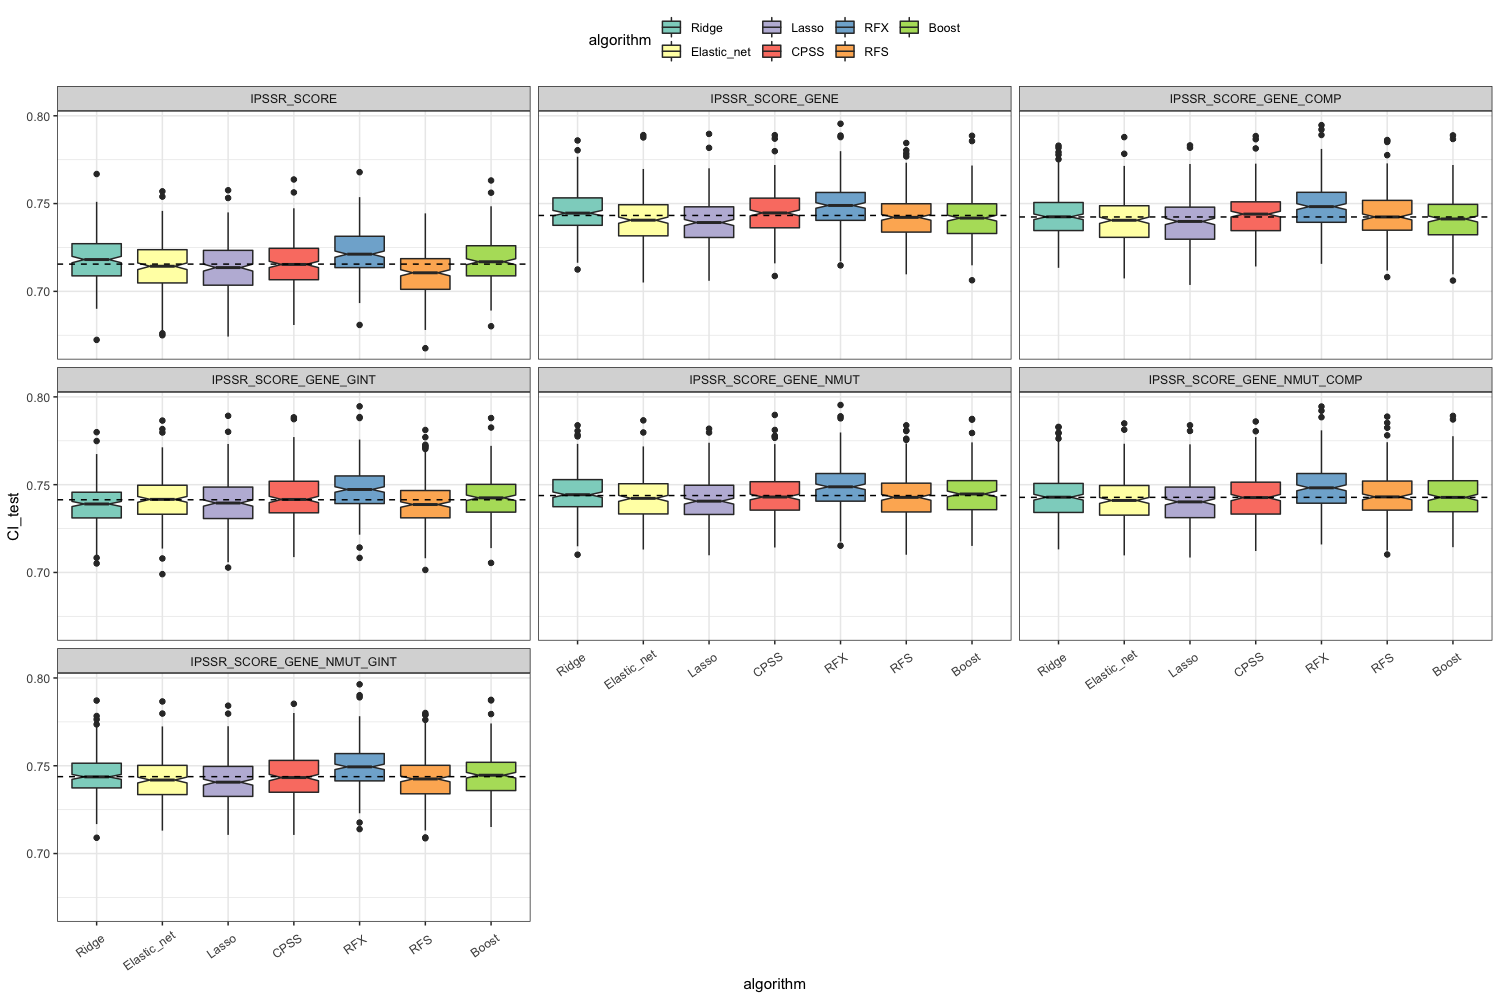

In [210]:
set_notebook_plot_size(15,10)
ggplot(df_ipssr,aes(x=algorithm,y=CI_test)) +
    geom_boxplot(aes(fill = algorithm), notch=T)+
    scale_fill_manual(values = c('#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69'))+
    facet_wrap( ~ model, ncol=3) +
    geom_hline(data = model_medians, aes(yintercept = Z), linetype = 2)+
    theme(legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8)) 
    

    

In [211]:
table_res <- as.data.frame(matrix(0,nrow = 7, ncol=7))
colnames(table_res)<-levels(df_ipssr$model)
rownames(table_res)<-levels(df_ipssr$algorithm)

for(model in colnames(table_res)){
    for(algo in rownames(table_res)){
        table_res[algo,model]<-median(df_ipssr$CI_test[df_ipssr$model==model & df_ipssr$algorithm==algo])
    }
}
table_res

,IPSSR_SCORE,IPSSR_SCORE_GENE,IPSSR_SCORE_GENE_COMP,IPSSR_SCORE_GENE_GINT,IPSSR_SCORE_GENE_NMUT,IPSSR_SCORE_GENE_NMUT_COMP,IPSSR_SCORE_GENE_NMUT_GINT
Ridge,0.7181179,0.7445674,0.7424604,0.7389965,0.7442863,0.7428670,0.7436632
Elastic_net,0.7142946,0.7405402,0.7404912,0.7416296,0.7421973,0.7410125,0.7418769
Lasso,0.7135422,0.7392057,0.7398232,0.7395429,0.7406025,0.7401975,0.7406502
CPSS,0.7153322,0.7446723,0.7440101,0.7415814,0.7429714,0.7426460,0.7432670
RFX,0.7211868,0.7489259,0.7482653,0.7472521,0.7487812,0.7482047,0.7493722
RFS,0.7105794,0.7421389,0.7423864,0.7386870,0.7427648,0.7430390,0.7424841
Boost,0.7168640,0.7417281,0.7412342,0.7424990,0.7446840,0.7427571,0.7446099


In [212]:
table_res$algo<-rownames(table_res)
rownames(table_res)<-NULL
table_res<-melt(table_res,id='algo')
colnames(table_res)<-c('algo','model','CI_test')
table_res$algo<-factor(table_res$algo,levels=c('Ridge','Elastic_net','Lasso','CPSS','RFX','RFS','Boost'))
table_res$model<-factor(table_res$model)

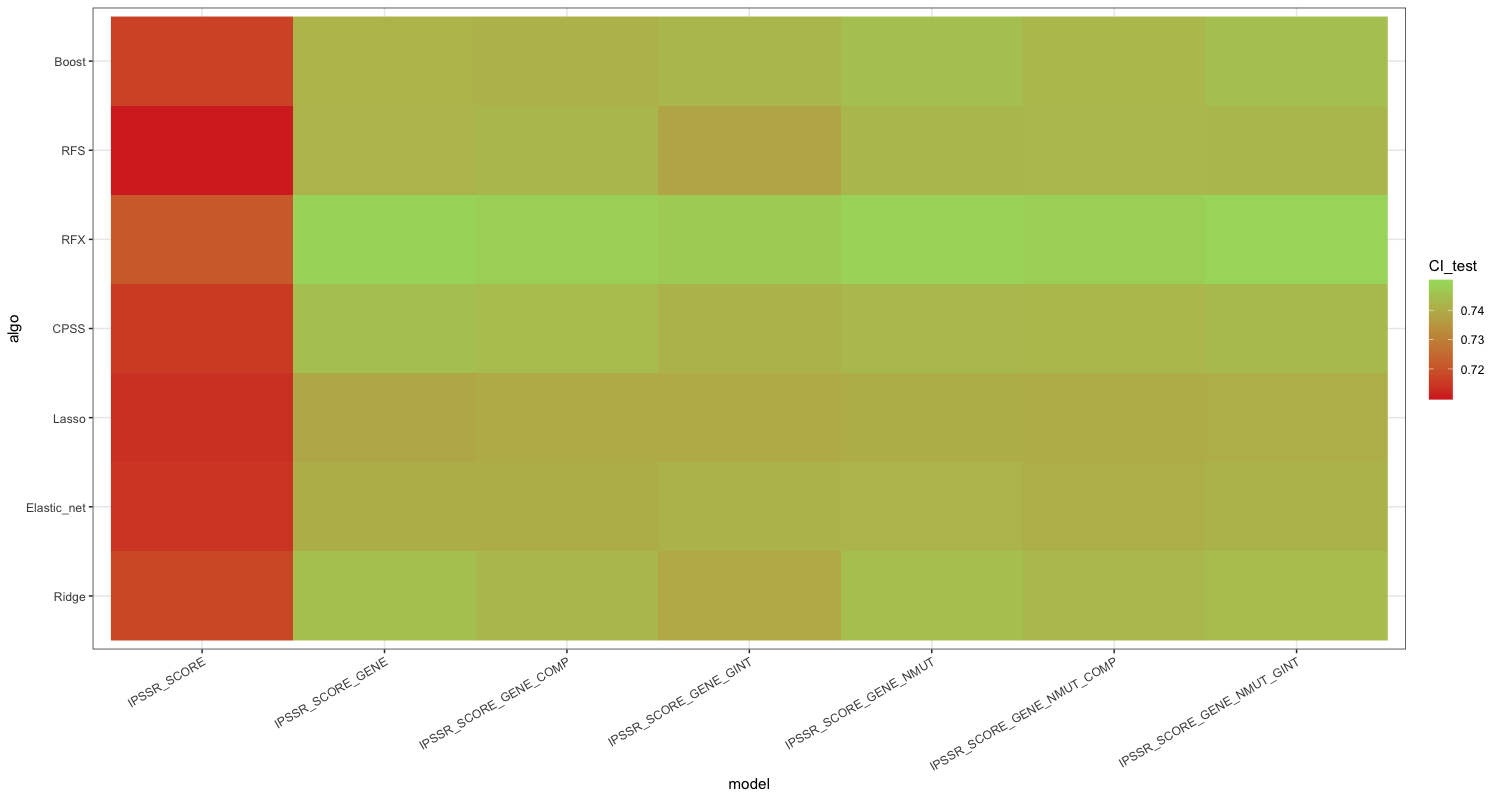

In [213]:
set_notebook_plot_size(15,8)
ggplot(table_res, aes(model, algo)) +

    # geom raster heatmap
    geom_raster(aes(fill = CI_test), show.legend = TRUE) +
    scale_fill_gradient(low="#d73027", high="#a6d96a") +
    tilt_x_label(30) 
    

# Aneuploidy

In [214]:
algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY <- read.table('./scripts/predictive_algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY.tsv',sep='\t')
algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY$model <- 'CLIN_DEMO_CYTO_GENE_ANEUPLOIDY'
algo_CLIN_DEMO_TOPCYTO_GENE_ANEUPLOIDY <- read.table('./scripts/predictive_algo_CLIN_DEMO_TOPCYTO_GENE_ANEUPLOIDY.tsv',sep='\t')
algo_CLIN_DEMO_TOPCYTO_GENE_ANEUPLOIDY$model <- 'CLIN_DEMO_TOPCYTO_GENE_ANEUPLOIDY'

algo_IPSSR_GENE_ANEUPLOIDY <- read.table('./scripts/predictive_algo_IPSSR_GENE_ANEUPLOIDY.tsv',sep='\t')
algo_IPSSR_GENE_ANEUPLOIDY$model <- 'IPSSR_GENE_ANEUPLOIDY'


In [215]:
algo_RFS1000_CLIN_DEMO_CYTO_GENE <- read.table('./scripts/predictive_algo_CLIN_DEMO_CYTO_GENE_RFS1000.tsv')
colnames(algo_RFS1000_CLIN_DEMO_CYTO_GENE)<-'RFS'
algo_RFX_CLIN_DEMO_CYTO_GENE <- read.table('./scripts/predictive_algo_CLIN_DEMO_CYTO_GENE_RFX.tsv')
colnames(algo_RFX_CLIN_DEMO_CYTO_GENE)<-'RFX'
algo_CLIN_DEMO_CYTO_GENE <- cbind(algo_RFS1000_CLIN_DEMO_CYTO_GENE,algo_RFX_CLIN_DEMO_CYTO_GENE)
algo_CLIN_DEMO_CYTO_GENE$model<-'CLIN_DEMO_CYTO_GENE'
algo_CLIN_DEMO_CYTO_GENE<-melt(algo_CLIN_DEMO_CYTO_GENE,id='model')

In [216]:
algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY <- melt(algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY,id='model')
algo_CLIN_DEMO_TOPCYTO_GENE_ANEUPLOIDY <- melt(algo_CLIN_DEMO_TOPCYTO_GENE_ANEUPLOIDY,id='model')
algo_IPSSR_GENE_ANEUPLOIDY <- melt(algo_IPSSR_GENE_ANEUPLOIDY,id='model')

In [217]:
df_aneuploidy <- rbind(
    algo_IPSSR_GENE_ANEUPLOIDY,
    algo_CLIN_DEMO_CYTO_GENE,
    algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY,
    algo_CLIN_DEMO_TOPCYTO_GENE_ANEUPLOIDY
)
colnames(df_aneuploidy) <- c('model','algorithm','CI_test')

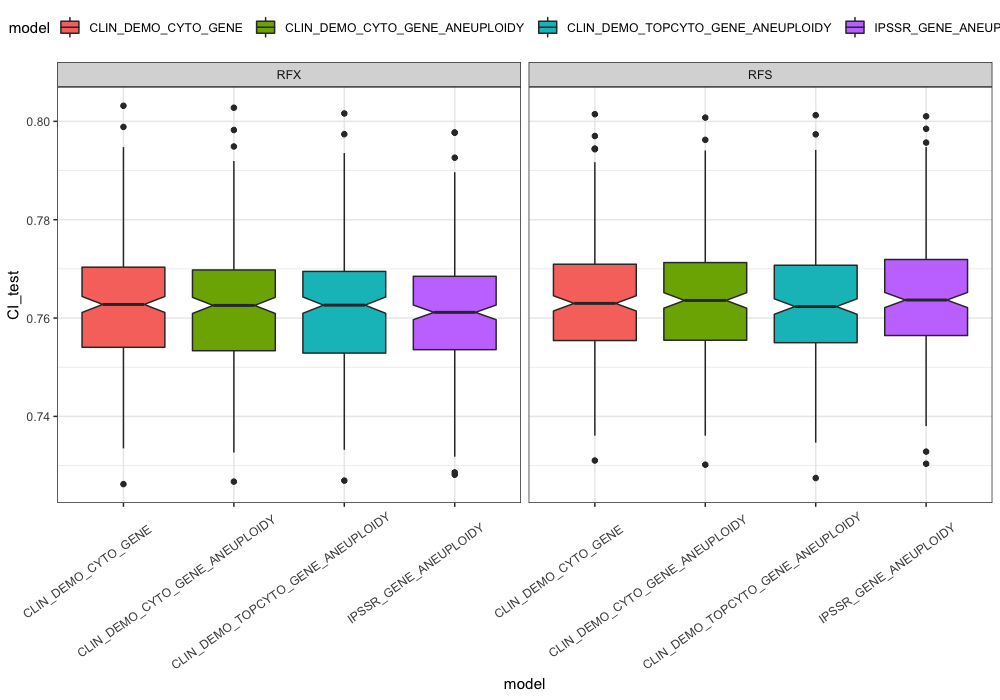

In [218]:
set_notebook_plot_size(10,7)
ggplot(df_aneuploidy,aes(x=model,y=CI_test)) +
    geom_boxplot(aes(fill = model), notch=T)+
    #scale_fill_manual(values = c('#8dd3c7','#ffffb3'))+
    facet_wrap( ~ algorithm, nrow=1) +
    theme(legend.position="top",axis.text.x = element_text(angle = 35, hjust = 0.8,vjust=0.8)) 
    

    

In [21]:
head(df_aneuploidy)

model,algorithm,CI_test
IPSSR_GENE_ANEUPLOIDY,RFX,0.7646923
IPSSR_GENE_ANEUPLOIDY,RFX,0.7633063
IPSSR_GENE_ANEUPLOIDY,RFX,0.7666904
IPSSR_GENE_ANEUPLOIDY,RFX,0.7538061
IPSSR_GENE_ANEUPLOIDY,RFX,0.7655931
IPSSR_GENE_ANEUPLOIDY,RFX,0.7621208


In [336]:
head(cbind(algo_CLIN_DEMO_CYTO_GENE,algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY))
table(algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY$variable)
table(algo_CLIN_DEMO_CYTO_GENE$variable)

model,variable,value,model,variable,value
CLIN_DEMO_CYTO_GENE,RFS,0.7613627,CLIN_DEMO_CYTO_GENE_ANEUPLOIDY,RFX,0.7695379
CLIN_DEMO_CYTO_GENE,RFS,0.7655675,CLIN_DEMO_CYTO_GENE_ANEUPLOIDY,RFX,0.7634822
CLIN_DEMO_CYTO_GENE,RFS,0.7691297,CLIN_DEMO_CYTO_GENE_ANEUPLOIDY,RFX,0.7687545
CLIN_DEMO_CYTO_GENE,RFS,0.7565689,CLIN_DEMO_CYTO_GENE_ANEUPLOIDY,RFX,0.7513886
CLIN_DEMO_CYTO_GENE,RFS,0.7554026,CLIN_DEMO_CYTO_GENE_ANEUPLOIDY,RFX,0.7663789
CLIN_DEMO_CYTO_GENE,RFS,0.7686263,CLIN_DEMO_CYTO_GENE_ANEUPLOIDY,RFX,0.7666854



RFX RFS 
250 250 


RFS RFX 
250 250 

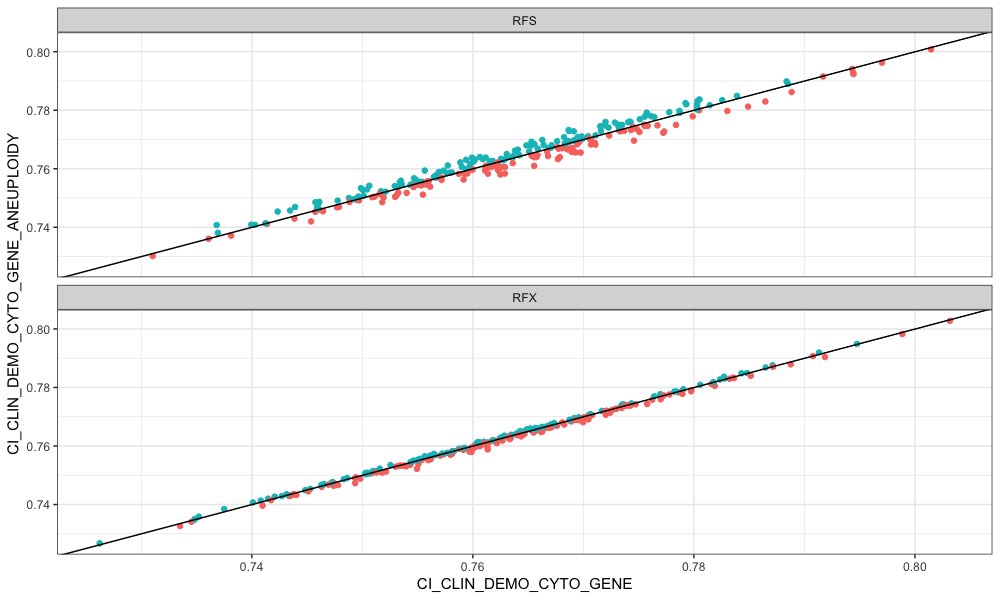

In [344]:
df_aneuploidy2 <- algo_CLIN_DEMO_CYTO_GENE
df_aneuploidy2$model <- NULL
colnames(df_aneuploidy2)<- c('algorithm','CI_CLIN_DEMO_CYTO_GENE')
df_aneuploidy2$CI_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY <- algo_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY$value[c(251:500,1:250)] # not same order for algorithms
df_aneuploidy2$col <- df_aneuploidy2$CI_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY/df_aneuploidy2$CI_CLIN_DEMO_CYTO_GENE > 1

set_notebook_plot_size(width = 10, height = 6)

ggplot(df_aneuploidy2, aes(x = CI_CLIN_DEMO_CYTO_GENE, y = CI_CLIN_DEMO_CYTO_GENE_ANEUPLOIDY)) +
    geom_point(aes(col=col)) +
    facet_wrap(~ algorithm, nrow = 2) + 
    geom_abline(slope = 1, intercept = 0) +
    theme(legend.position = "none")


# OS, AML transformation and competing risks

Feature selection with LASSO bootstrapping is performed for OS, AML transformation (`glmnet` R package) and competing risks (`crrp` R package) for CLIN+DEMO+CYTO and CLIN+DEMO+CYTO+GENE.
For each model and for each nature of prediction, we count the number of time each feature is selected by the bootstrapping (100 performed) and we rank the features to obtain a feature importance.
For competing risks, one run is performed to get the best lambda (minimizing the BIC) on the whole dataset and then the boostrapping is performed with this lambda.

### CLIN + DEMO + CYTO

In [230]:
CLIN_DEMO_CYTO <- read.table('CLIN_DEMO_CYTO_bootstrapping_OS_AML_CR.tsv',header=T,sep='\t')

In [231]:
head(CLIN_DEMO_CYTO_CR)

,feature,coef,pred
31,CENTER_DUS,0.09728430,Competing_risks
91,CENTER_HMS,1.22902993,Competing_risks
201,CENTER_UMG,0.63348096,Competing_risks
302,BM_BLAST,0.07953906,Competing_risks
382,del12p,0.23468779,Competing_risks
432,del18,0.40608124,Competing_risks


In [232]:
count_var<-get_table(CLIN_DEMO_CYTO_CR$feature,add_total_count = F)
count_var[count_var$values=='r_5_5',]

,values,count,freq
141,r_5_5,17,1.022864


In [233]:
CLIN_DEMO_CYTO_CR_reduced<-CLIN_DEMO_CYTO_CR[abs(CLIN_DEMO_CYTO_CR$coef)>=10,]
count_var_exp<-get_table(CLIN_DEMO_CYTO_CR_reduced$feature,add_total_count = F)

In [234]:
count_var_exp<-count_var_exp[count_var_exp$count>0,1:2]
colnames(count_var_exp)<-c('values','count_10')

In [235]:
count_var_exp$global_count<-sapply(count_var_exp$values,function(x){return(count_var$count[count_var$values==x])})
count_var_exp[1:10,]

,values,count_10,global_count
146,r_x_x,11,41
141,r_5_5,7,17
48,del1q,3,4
86,plus11,3,41
143,r_7_17,3,30
18,CENTER_REL,2,10
21,CENTER_TUD,2,3
26,CK,2,93
40,del17,2,8
59,del3q,2,4


In [236]:
CLIN_DEMO_CYTO_OS <- CLIN_DEMO_CYTO[CLIN_DEMO_CYTO$pred=='OS',]
CLIN_DEMO_CYTO_AML <- CLIN_DEMO_CYTO[CLIN_DEMO_CYTO$pred=='AML',]
CLIN_DEMO_CYTO_CR <- CLIN_DEMO_CYTO[CLIN_DEMO_CYTO$pred=='Competing_risks',]


In [302]:
ranking<- function(feature_count,with_NA=FALSE){
    
    
    tmp<-1
    i<-1
    for(k in 2:nrow(feature_count)){
        val<-tmp[length(tmp)]
        if(!with_NA){
            if(feature_count$count[k]==feature_count$count[k-1]){
                i<-i+1
                tmp<-c(tmp,val)
            } else{
                tmp<-c(tmp,val+i)
                i<-1
            }
        } else {
            if(feature_count$count[k]==0){tmp<-c(tmp,NA)}
        
            else if(feature_count$count[k]==feature_count$count[k-1]){
                i<-i+1
                tmp<-c(tmp,val)
            } else{
                tmp<-c(tmp,val+i)
                i<-1
            }
        }
        
    }
    return(tmp)
}

In [238]:
feature_count_CLIN_DEMO_CYTO_OS <- get_table(CLIN_DEMO_CYTO_OS[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_AML <- get_table(CLIN_DEMO_CYTO_AML[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_CR <- get_table(CLIN_DEMO_CYTO_CR[,'feature'],add_total_count = FALSE)[,1:2]



In [239]:
feature_count_CLIN_DEMO_CYTO_OS$rank <- ranking(feature_count_CLIN_DEMO_CYTO_OS)
feature_count_CLIN_DEMO_CYTO_AML$rank <- ranking(feature_count_CLIN_DEMO_CYTO_AML)
feature_count_CLIN_DEMO_CYTO_CR$rank <- ranking(feature_count_CLIN_DEMO_CYTO_CR)

In [240]:
CLIN_DEMO_CYTO_ranking <- data.frame(features=feature_count_CLIN_DEMO_CYTO_OS$values,
                                     OS_rank=feature_count_CLIN_DEMO_CYTO_OS$rank)
CLIN_DEMO_CYTO_ranking$AML_rank<-sapply(CLIN_DEMO_CYTO_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_AML$rank[feature_count_CLIN_DEMO_CYTO_AML$values==x])})
CLIN_DEMO_CYTO_ranking$CR_rank<-sapply(CLIN_DEMO_CYTO_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_CR$rank[feature_count_CLIN_DEMO_CYTO_CR$values==x])})


In [241]:
spearman_cor <- data.frame(cbind(cor(CLIN_DEMO_CYTO_ranking$OS_rank, CLIN_DEMO_CYTO_ranking$AML_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_ranking$OS_rank, CLIN_DEMO_CYTO_ranking$CR_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_ranking$AML_rank, CLIN_DEMO_CYTO_ranking$CR_rank, method=c("spearman"))))
colnames(spearman_cor)<-c('OS_AML','OS_CR','AML_CR')
rownames(spearman_cor)<-"Spearman_correlation"
spearman_cor

,OS_AML,OS_CR,AML_CR
Spearman_correlation,0.3502443,0.1803115,0.4874634


In [242]:
CLIN_DEMO_CYTO_ranking<-melt(CLIN_DEMO_CYTO_ranking,id='features')
colnames(CLIN_DEMO_CYTO_ranking)<-c('features','pred','rank')
head(CLIN_DEMO_CYTO_ranking)
CLIN_DEMO_CYTO_ranking$features<-factor(CLIN_DEMO_CYTO_ranking$features,levels=rev(feature_count_CLIN_DEMO_CYTO_OS$values))

features,pred,rank
AGE,OS_rank,1
BM_BLAST,OS_rank,1
CK,OS_rank,1
del7,OS_rank,1
HB,OS_rank,1
PLT,OS_rank,1


In [243]:
summary(CLIN_DEMO_CYTO_ranking$rank)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   36.00   74.00   70.17  102.00  145.00 

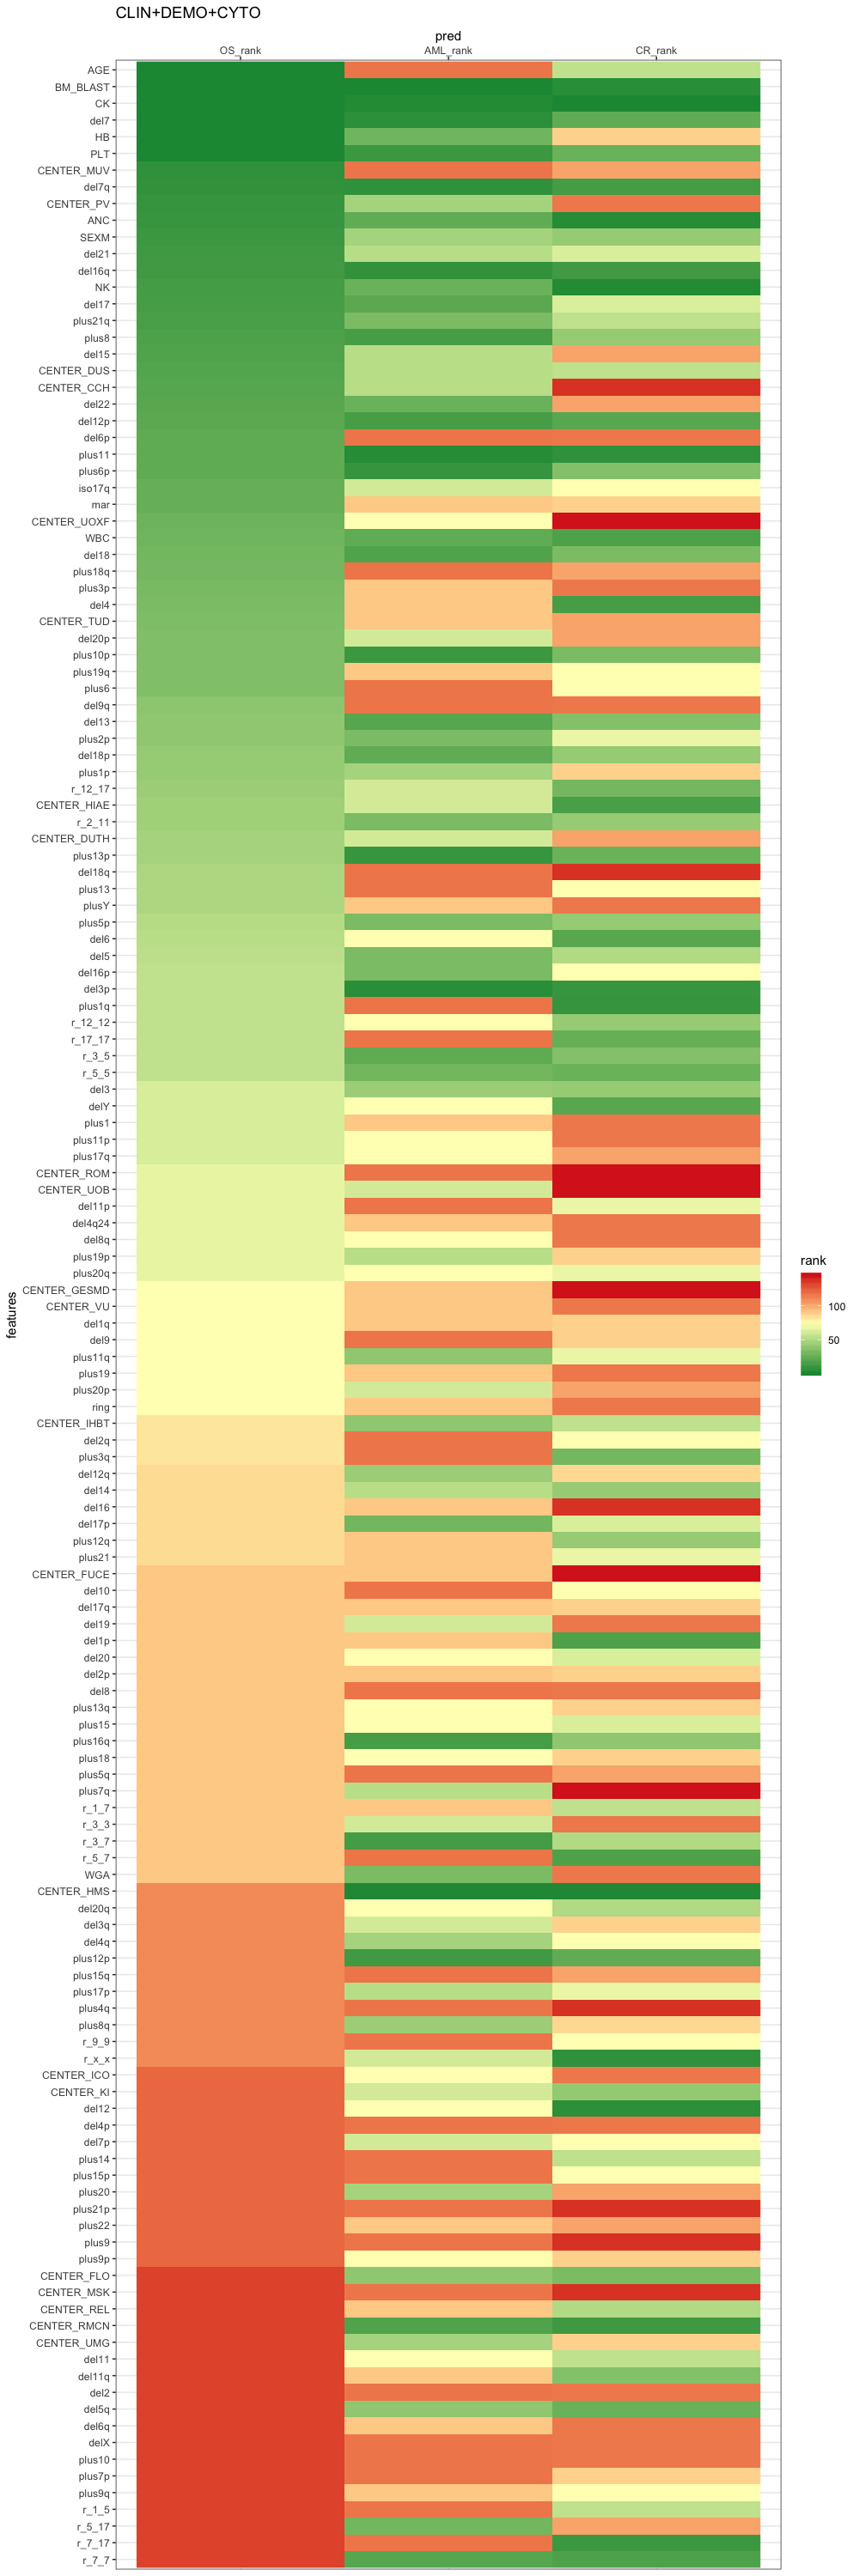

In [244]:
set_notebook_plot_size(10,30)
ggplot(CLIN_DEMO_CYTO_ranking, aes(features,pred)) +
  
  # geom raster heatmap
  geom_raster(aes(fill = rank), show.legend = TRUE) +
  scale_fill_gradient2(low="#1a9641", high="#d7191c",mid = "#ffffbf",midpoint=74,na.value = 'white') +
  scale_y_discrete(position = "right") +
  #theme(axis.text.x.top = element_text(angle = 30, hjust = 1)) +
  coord_flip() +
  ggtitle('CLIN+DEMO+CYTO')


### CLIN + DEMO + CYTO + GENE

In [245]:
CLIN_DEMO_CYTO_GENE <- read.table('CLIN_DEMO_CYTO_GENE_bootstrapping_OS_AML_CR.tsv',header=T,sep='\t')

In [246]:
CLIN_DEMO_CYTO_GENE_OS <- CLIN_DEMO_CYTO_GENE[CLIN_DEMO_CYTO_GENE$pred=='OS',]
CLIN_DEMO_CYTO_GENE_AML <- CLIN_DEMO_CYTO_GENE[CLIN_DEMO_CYTO_GENE$pred=='AML',]
CLIN_DEMO_CYTO_GENE_CR <- CLIN_DEMO_CYTO_GENE[CLIN_DEMO_CYTO_GENE$pred=='Competing_risks',]


In [247]:
feature_count_CLIN_DEMO_CYTO_GENE_OS <- get_table(CLIN_DEMO_CYTO_GENE_OS[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_GENE_AML <- get_table(CLIN_DEMO_CYTO_GENE_AML[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_GENE_CR <- get_table(CLIN_DEMO_CYTO_GENE_CR[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_GENE_OS$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_OS)
feature_count_CLIN_DEMO_CYTO_GENE_AML$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_AML)
feature_count_CLIN_DEMO_CYTO_GENE_CR$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_CR)


In [248]:
CLIN_DEMO_CYTO_GENE_ranking <- data.frame(features=feature_count_CLIN_DEMO_CYTO_GENE_OS$values,
                                     OS_rank=feature_count_CLIN_DEMO_CYTO_GENE_OS$rank)
CLIN_DEMO_CYTO_GENE_ranking$AML_rank<-sapply(CLIN_DEMO_CYTO_GENE_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_GENE_AML$rank[feature_count_CLIN_DEMO_CYTO_GENE_AML$values==x])})
CLIN_DEMO_CYTO_GENE_ranking$CR_rank<-sapply(CLIN_DEMO_CYTO_GENE_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_GENE_CR$rank[feature_count_CLIN_DEMO_CYTO_GENE_CR$values==x])})


In [249]:
spearman_cor <- data.frame(cbind(cor(CLIN_DEMO_CYTO_GENE_ranking$OS_rank, CLIN_DEMO_CYTO_GENE_ranking$AML_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_GENE_ranking$OS_rank, CLIN_DEMO_CYTO_GENE_ranking$CR_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_GENE_ranking$AML_rank, CLIN_DEMO_CYTO_GENE_ranking$CR_rank, method=c("spearman"))))
colnames(spearman_cor)<-c('OS_AML','OS_CR','AML_CR')
rownames(spearman_cor)<-"Spearman_correlation"
spearman_cor

,OS_AML,OS_CR,AML_CR
Spearman_correlation,0.4040276,0.2004843,0.4427261


In [250]:
CLIN_DEMO_CYTO_GENE_ranking<-melt(CLIN_DEMO_CYTO_GENE_ranking,id='features')
colnames(CLIN_DEMO_CYTO_GENE_ranking)<-c('features','pred','rank')
head(CLIN_DEMO_CYTO_GENE_ranking)
CLIN_DEMO_CYTO_GENE_ranking$features<-factor(CLIN_DEMO_CYTO_GENE_ranking$features,levels=rev(feature_count_CLIN_DEMO_CYTO_GENE_OS$values))



features,pred,rank
AGE,OS_rank,1
BM_BLAST,OS_rank,1
CK,OS_rank,1
HB,OS_rank,1
RUNX1,OS_rank,1
TP53_biallelic,OS_rank,1


In [251]:
summary(CLIN_DEMO_CYTO_GENE_ranking$rank)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    65.0   119.0   117.5   154.0   235.0 

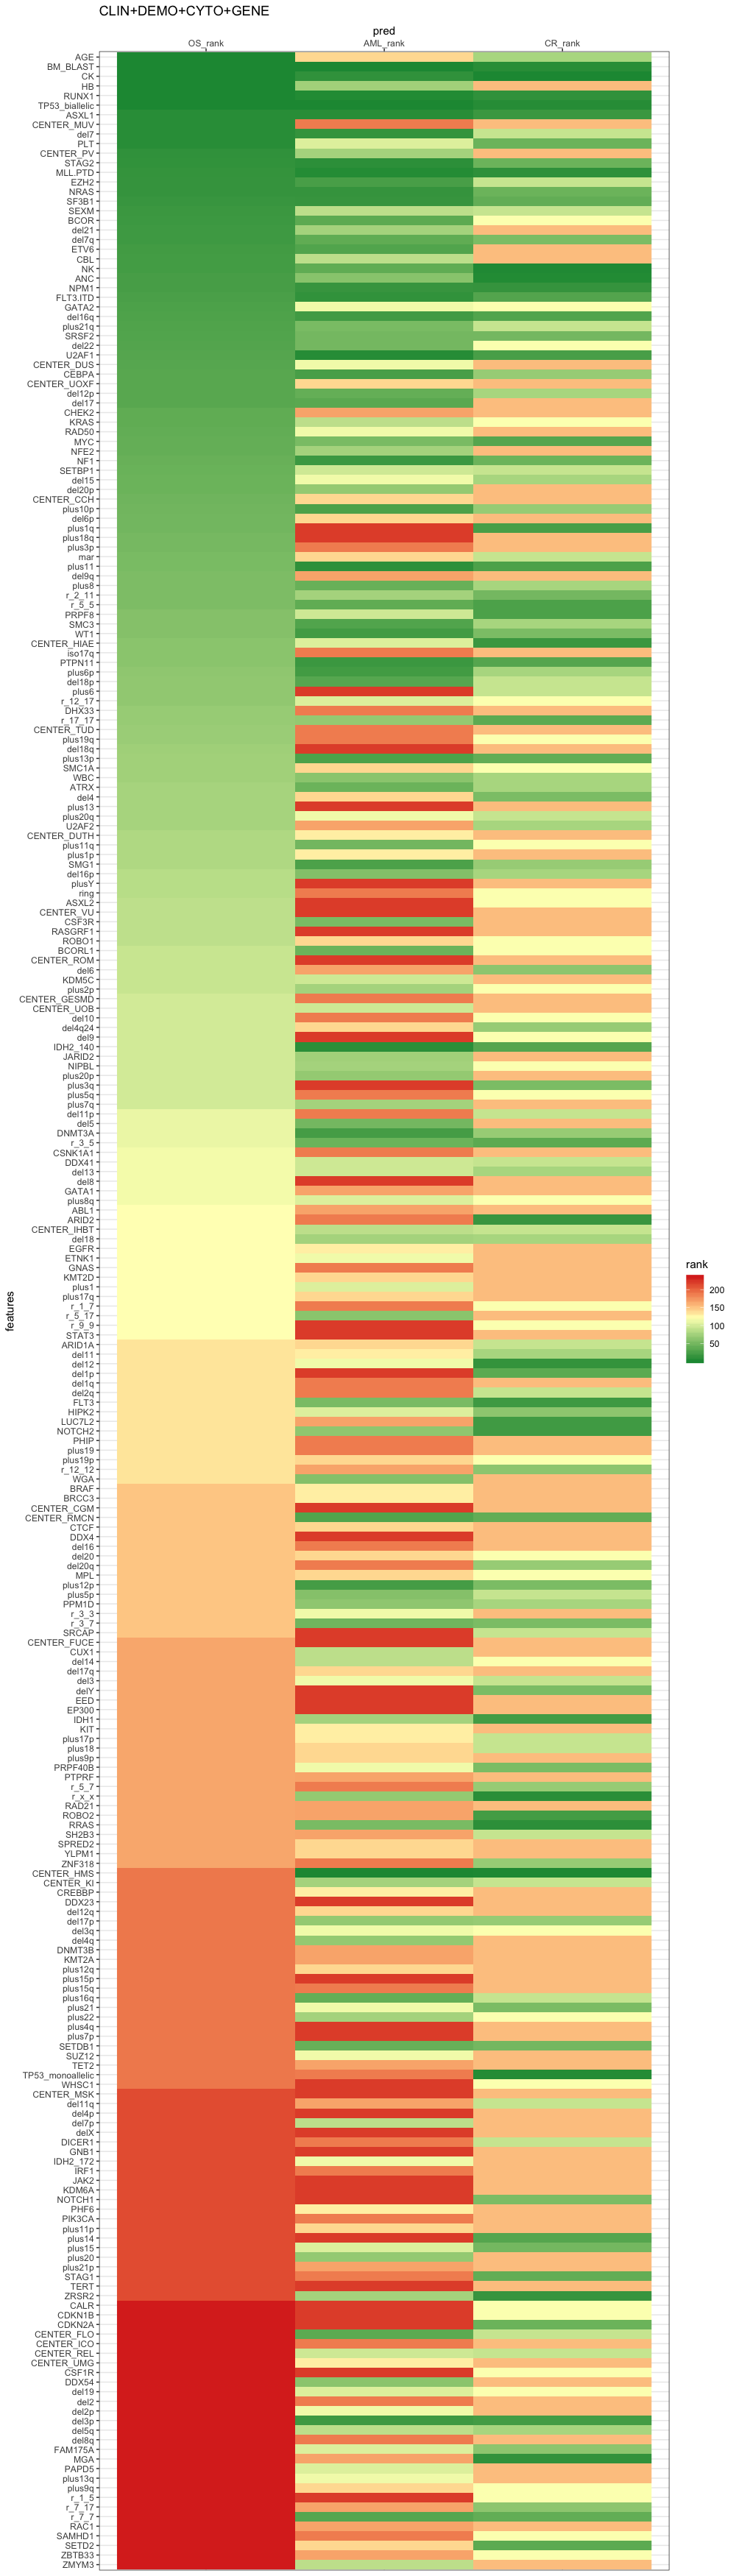

In [252]:
set_notebook_plot_size(10,35)
ggplot(CLIN_DEMO_CYTO_GENE_ranking, aes(features,pred)) +
  
  # geom raster heatmap
  geom_raster(aes(fill = rank), show.legend = TRUE) +
  scale_fill_gradient2(low="#1a9641", high="#d7191c",mid = "#ffffbf",midpoint=121,na.value = 'white') +
  scale_y_discrete(position = "right") +
  #theme(axis.text.x.top = element_text(angle = 30, hjust = 1)) +
  coord_flip() +
  ggtitle('CLIN+DEMO+CYTO+GENE')


## Competing risks 
Here the difference between using the same lambda for all bootstrap experiment and using the best lambda (minimizing the BIC) for each bootstrap experiment (computationally more intense) is described:

### CLIN+DEMO+CYTO

In [303]:
CLIN_DEMO_CYTO_CR_long <- read.table('CLIN_DEMO_CYTO_bootstrapping_CR_long.tsv',header=T,sep='\t')
CLIN_DEMO_CYTO_CR_long$pred <- paste0(CLIN_DEMO_CYTO_CR_long$pred,'_long')

CLIN_DEMO_CYTO <- read.table('CLIN_DEMO_CYTO_bootstrapping_OS_AML_CR.tsv',header=T,sep='\t')
CLIN_DEMO_CYTO_OS <- CLIN_DEMO_CYTO[CLIN_DEMO_CYTO$pred=='OS',]
CLIN_DEMO_CYTO_AML <- CLIN_DEMO_CYTO[CLIN_DEMO_CYTO$pred=='AML',]
CLIN_DEMO_CYTO_CR <- CLIN_DEMO_CYTO[CLIN_DEMO_CYTO$pred=='Competing_risks',]

In [304]:
feature_count_CLIN_DEMO_CYTO_OS <- get_table(CLIN_DEMO_CYTO_OS[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_AML <- get_table(CLIN_DEMO_CYTO_AML[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_CR <- get_table(CLIN_DEMO_CYTO_CR[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_CR_long <- get_table(CLIN_DEMO_CYTO_CR_long[,'feature'],add_total_count = FALSE)[,1:2]

# add missing features
features_CR_long <- feature_count_CLIN_DEMO_CYTO_CR_long$values[!feature_count_CLIN_DEMO_CYTO_CR_long$values%in%feature_count_CLIN_DEMO_CYTO_CR$values]
features_OS_AML_CR <- feature_count_CLIN_DEMO_CYTO_CR$values[!feature_count_CLIN_DEMO_CYTO_CR$values%in%feature_count_CLIN_DEMO_CYTO_CR_long$values]


feature_count_CLIN_DEMO_CYTO_OS <- rbind(feature_count_CLIN_DEMO_CYTO_OS,
                                        data.frame(values=features_CR_long,
                                                   count=0))
feature_count_CLIN_DEMO_CYTO_AML <- rbind(feature_count_CLIN_DEMO_CYTO_AML,
                                        data.frame(values=features_CR_long,
                                                   count=0))
feature_count_CLIN_DEMO_CYTO_CR <- rbind(feature_count_CLIN_DEMO_CYTO_CR,
                                        data.frame(values=features_CR_long,
                                                   count=0))
feature_count_CLIN_DEMO_CYTO_CR_long <- rbind(feature_count_CLIN_DEMO_CYTO_CR_long,
                                        data.frame(values=features_OS_AML_CR,
                                                   count=0))


feature_count_CLIN_DEMO_CYTO_OS$rank <- ranking(feature_count_CLIN_DEMO_CYTO_OS)
feature_count_CLIN_DEMO_CYTO_AML$rank <- ranking(feature_count_CLIN_DEMO_CYTO_AML)
feature_count_CLIN_DEMO_CYTO_CR$rank <- ranking(feature_count_CLIN_DEMO_CYTO_CR)
feature_count_CLIN_DEMO_CYTO_CR_long$rank <- ranking(feature_count_CLIN_DEMO_CYTO_CR_long)



In [305]:
CLIN_DEMO_CYTO_ranking <- data.frame(features=feature_count_CLIN_DEMO_CYTO_OS$values,
                                     OS_rank=feature_count_CLIN_DEMO_CYTO_OS$rank)
CLIN_DEMO_CYTO_ranking$AML_rank<-sapply(CLIN_DEMO_CYTO_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_AML$rank[feature_count_CLIN_DEMO_CYTO_AML$values==x])})
CLIN_DEMO_CYTO_ranking$CR_rank<-sapply(CLIN_DEMO_CYTO_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_CR$rank[feature_count_CLIN_DEMO_CYTO_CR$values==x])})
CLIN_DEMO_CYTO_ranking$CR_long_rank<-sapply(CLIN_DEMO_CYTO_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_CR_long$rank[feature_count_CLIN_DEMO_CYTO_CR_long$values==x])})


In [306]:
spearman_cor <- data.frame(cbind(cor(CLIN_DEMO_CYTO_ranking$OS_rank, CLIN_DEMO_CYTO_ranking$AML_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_ranking$OS_rank, CLIN_DEMO_CYTO_ranking$CR_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_ranking$OS_rank, CLIN_DEMO_CYTO_ranking$CR_long_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_ranking$AML_rank, CLIN_DEMO_CYTO_ranking$CR_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_ranking$AML_rank, CLIN_DEMO_CYTO_ranking$CR_long_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_ranking$CR_rank, CLIN_DEMO_CYTO_ranking$CR_long_rank, method=c("spearman"))))
colnames(spearman_cor)<-c('OS_AML','OS_CR','OS_CR_long','AML_CR','AML_CR_long','CR_CR_long')
rownames(spearman_cor)<-"Spearman_correlation"
spearman_cor

,OS_AML,OS_CR,OS_CR_long,AML_CR,AML_CR_long,CR_CR_long
Spearman_correlation,0.3744662,0.2187925,0.2155536,0.5067829,0.4150242,0.3305195


In [310]:

feature_count_CLIN_DEMO_CYTO_OS$rank <- ranking(feature_count_CLIN_DEMO_CYTO_OS, with_NA = T)
feature_count_CLIN_DEMO_CYTO_AML$rank <- ranking(feature_count_CLIN_DEMO_CYTO_AML, with_NA = T)
feature_count_CLIN_DEMO_CYTO_CR$rank <- ranking(feature_count_CLIN_DEMO_CYTO_CR, with_NA = T)
feature_count_CLIN_DEMO_CYTO_CR_long$rank <- ranking(feature_count_CLIN_DEMO_CYTO_CR_long, with_NA = T)

CLIN_DEMO_CYTO_ranking <- data.frame(features=feature_count_CLIN_DEMO_CYTO_OS$values,
                                     OS_rank=feature_count_CLIN_DEMO_CYTO_OS$rank)
CLIN_DEMO_CYTO_ranking$AML_rank<-sapply(CLIN_DEMO_CYTO_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_AML$rank[feature_count_CLIN_DEMO_CYTO_AML$values==x])})
CLIN_DEMO_CYTO_ranking$CR_rank<-sapply(CLIN_DEMO_CYTO_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_CR$rank[feature_count_CLIN_DEMO_CYTO_CR$values==x])})
CLIN_DEMO_CYTO_ranking$CR_long_rank<-sapply(CLIN_DEMO_CYTO_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_CR_long$rank[feature_count_CLIN_DEMO_CYTO_CR_long$values==x])})



CLIN_DEMO_CYTO_ranking<-melt(CLIN_DEMO_CYTO_ranking,id='features')
colnames(CLIN_DEMO_CYTO_ranking)<-c('features','pred','rank')
CLIN_DEMO_CYTO_ranking$features<-factor(CLIN_DEMO_CYTO_ranking$features,levels=rev(feature_count_CLIN_DEMO_CYTO_OS$values))



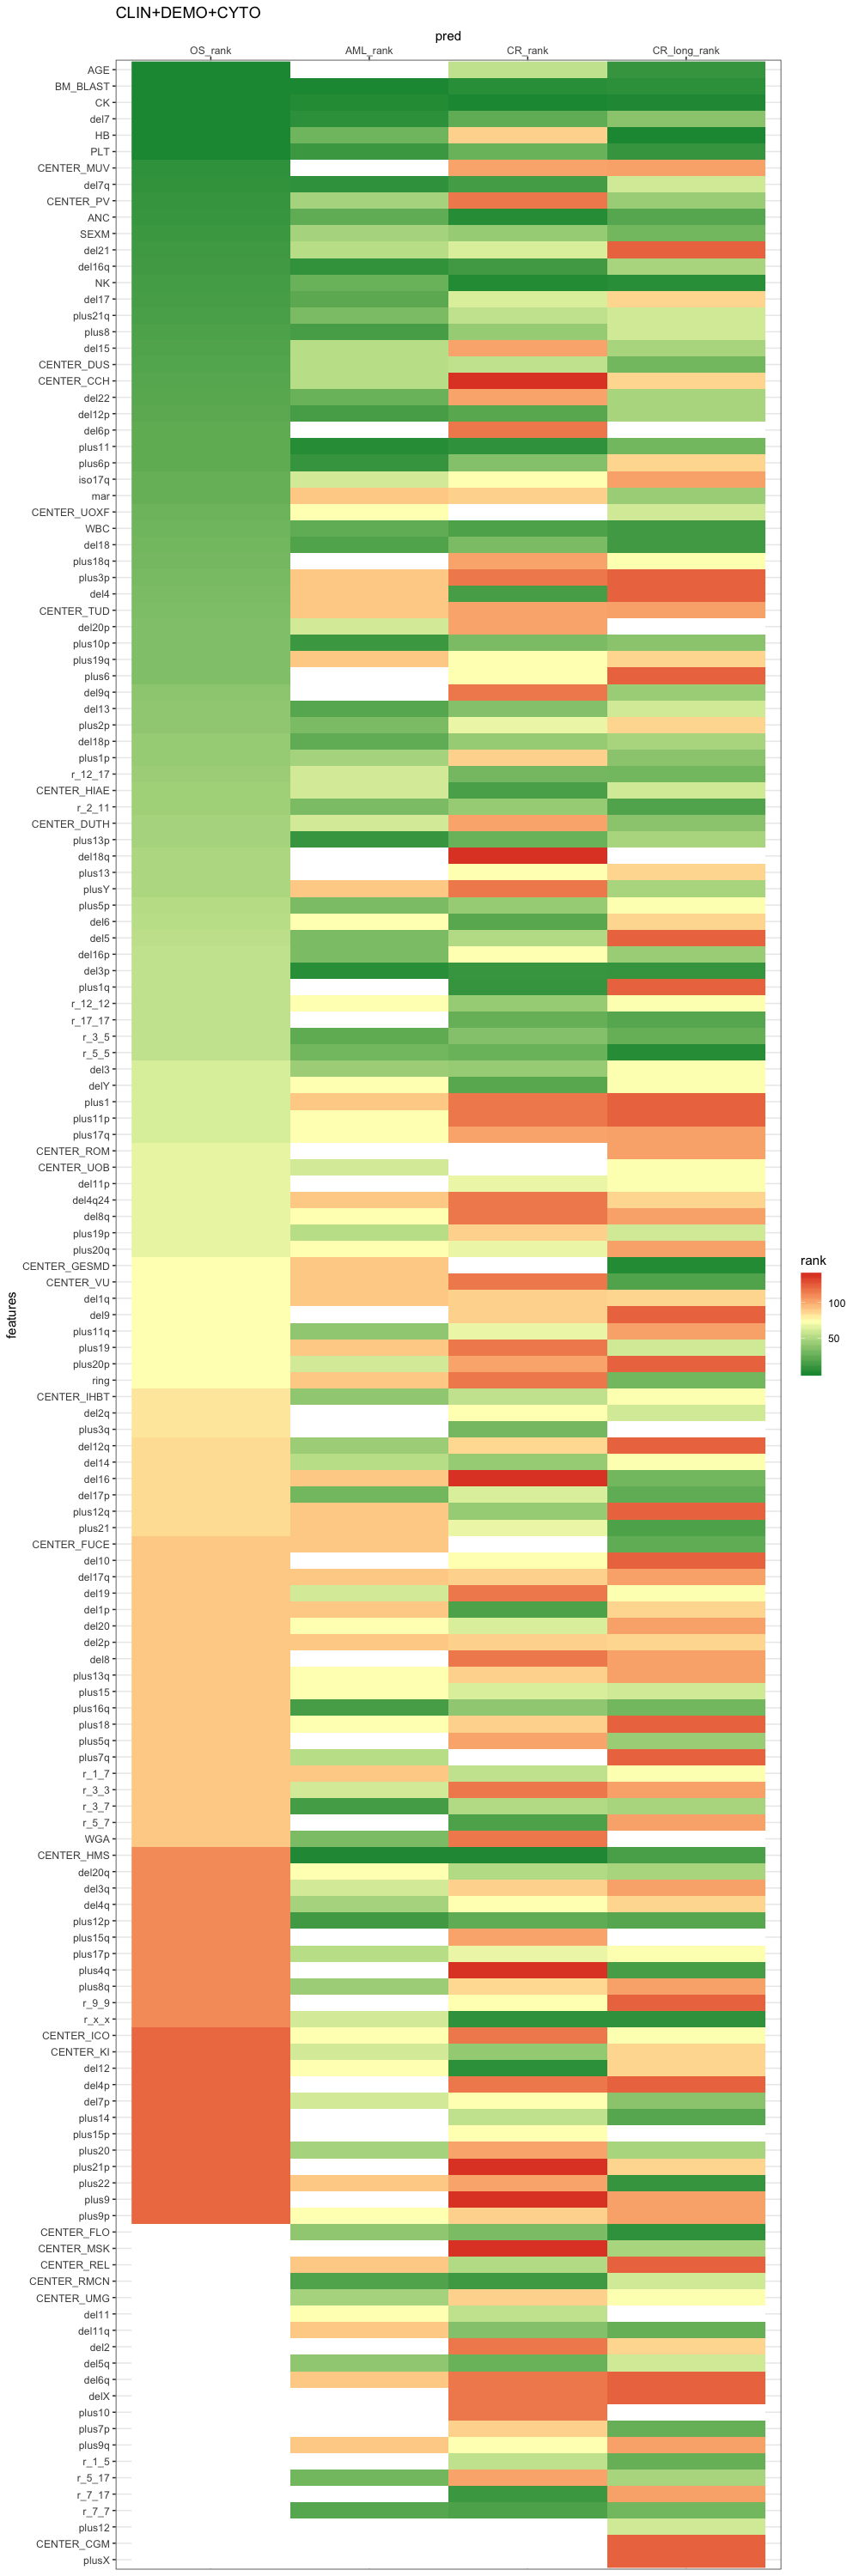

In [311]:
set_notebook_plot_size(10,30)
ggplot(CLIN_DEMO_CYTO_ranking, aes(features,pred)) +
  
  # geom raster heatmap
  geom_raster(aes(fill = rank), show.legend = TRUE) +
  scale_fill_gradient2(low="#1a9641", high="#d7191c",mid = "#ffffbf",midpoint=74,na.value = 'white') +
  scale_y_discrete(position = "right") +
  #theme(axis.text.x.top = element_text(angle = 30, hjust = 1)) +
  coord_flip() +
  ggtitle('CLIN+DEMO+CYTO')


## CLIN+DEMO+CYTO+GENE

In [325]:
CLIN_DEMO_CYTO_GENE_CR_long <- read.table('CLIN_DEMO_CYTO_GENE_bootstrapping_CR_long.tsv',header=T,sep='\t')
CLIN_DEMO_CYTO_GENE_CR_long$pred <- paste0(CLIN_DEMO_CYTO_GENE_CR_long$pred,'_long')

CLIN_DEMO_CYTO_GENE <- read.table('CLIN_DEMO_CYTO_GENE_bootstrapping_OS_AML_CR.tsv',header=T,sep='\t')
CLIN_DEMO_CYTO_GENE_OS <- CLIN_DEMO_CYTO_GENE[CLIN_DEMO_CYTO_GENE$pred=='OS',]
CLIN_DEMO_CYTO_GENE_AML <- CLIN_DEMO_CYTO_GENE[CLIN_DEMO_CYTO_GENE$pred=='AML',]
CLIN_DEMO_CYTO_GENE_CR <- CLIN_DEMO_CYTO_GENE[CLIN_DEMO_CYTO_GENE$pred=='Competing_risks',]

In [326]:
feature_count_CLIN_DEMO_CYTO_GENE_OS <- get_table(CLIN_DEMO_CYTO_GENE_OS[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_GENE_AML <- get_table(CLIN_DEMO_CYTO_GENE_AML[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_GENE_CR <- get_table(CLIN_DEMO_CYTO_GENE_CR[,'feature'],add_total_count = FALSE)[,1:2]
feature_count_CLIN_DEMO_CYTO_GENE_CR_long <- get_table(CLIN_DEMO_CYTO_GENE_CR_long[,'feature'],add_total_count = FALSE)[,1:2]

# add missing features
features_CR_long <- feature_count_CLIN_DEMO_CYTO_GENE_CR_long$values[!feature_count_CLIN_DEMO_CYTO_GENE_CR_long$values%in%feature_count_CLIN_DEMO_CYTO_GENE_CR$values]
features_OS_AML_CR <- feature_count_CLIN_DEMO_CYTO_GENE_CR$values[!feature_count_CLIN_DEMO_CYTO_GENE_CR$values%in%feature_count_CLIN_DEMO_CYTO_GENE_CR_long$values]


feature_count_CLIN_DEMO_CYTO_GENE_OS <- rbind(feature_count_CLIN_DEMO_CYTO_GENE_OS,
                                        data.frame(values=features_CR_long,
                                                   count=0))
feature_count_CLIN_DEMO_CYTO_GENE_AML <- rbind(feature_count_CLIN_DEMO_CYTO_GENE_AML,
                                        data.frame(values=features_CR_long,
                                                   count=0))
feature_count_CLIN_DEMO_CYTO_GENE_CR <- rbind(feature_count_CLIN_DEMO_CYTO_GENE_CR,
                                        data.frame(values=features_CR_long,
                                                   count=0))
feature_count_CLIN_DEMO_CYTO_GENE_CR_long <- rbind(feature_count_CLIN_DEMO_CYTO_GENE_CR_long,
                                        data.frame(values=features_OS_AML_CR,
                                                   count=0))


feature_count_CLIN_DEMO_CYTO_GENE_OS$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_OS)
feature_count_CLIN_DEMO_CYTO_GENE_AML$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_AML)
feature_count_CLIN_DEMO_CYTO_GENE_CR$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_CR)
feature_count_CLIN_DEMO_CYTO_GENE_CR_long$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_CR_long)



In [327]:
CLIN_DEMO_CYTO_GENE_ranking <- data.frame(features=feature_count_CLIN_DEMO_CYTO_GENE_OS$values,
                                     OS_rank=feature_count_CLIN_DEMO_CYTO_GENE_OS$rank)
CLIN_DEMO_CYTO_GENE_ranking$AML_rank<-sapply(CLIN_DEMO_CYTO_GENE_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_GENE_AML$rank[feature_count_CLIN_DEMO_CYTO_GENE_AML$values==x])})
CLIN_DEMO_CYTO_GENE_ranking$CR_rank<-sapply(CLIN_DEMO_CYTO_GENE_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_GENE_CR$rank[feature_count_CLIN_DEMO_CYTO_GENE_CR$values==x])})
CLIN_DEMO_CYTO_GENE_ranking$CR_long_rank<-sapply(CLIN_DEMO_CYTO_GENE_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_GENE_CR_long$rank[feature_count_CLIN_DEMO_CYTO_GENE_CR_long$values==x])})


In [328]:
spearman_cor <- data.frame(cbind(cor(CLIN_DEMO_CYTO_GENE_ranking$OS_rank, CLIN_DEMO_CYTO_GENE_ranking$AML_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_GENE_ranking$OS_rank, CLIN_DEMO_CYTO_GENE_ranking$CR_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_GENE_ranking$OS_rank, CLIN_DEMO_CYTO_GENE_ranking$CR_long_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_GENE_ranking$AML_rank, CLIN_DEMO_CYTO_GENE_ranking$CR_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_GENE_ranking$AML_rank, CLIN_DEMO_CYTO_GENE_ranking$CR_long_rank, method=c("spearman")),
                             cor(CLIN_DEMO_CYTO_GENE_ranking$CR_rank, CLIN_DEMO_CYTO_GENE_ranking$CR_long_rank, method=c("spearman"))))
colnames(spearman_cor)<-c('OS_AML','OS_CR','OS_CR_long','AML_CR','AML_CR_long','CR_CR_long')
rownames(spearman_cor)<-"Spearman_correlation"
spearman_cor

,OS_AML,OS_CR,OS_CR_long,AML_CR,AML_CR_long,CR_CR_long
Spearman_correlation,0.4437245,0.2395841,0.09768059,0.4658836,0.1983988,0.2846965


In [329]:
feature_count_CLIN_DEMO_CYTO_GENE_OS$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_OS, with_NA = T)
feature_count_CLIN_DEMO_CYTO_GENE_AML$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_AML, with_NA = T)
feature_count_CLIN_DEMO_CYTO_GENE_CR$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_CR, with_NA = T)
feature_count_CLIN_DEMO_CYTO_GENE_CR_long$rank <- ranking(feature_count_CLIN_DEMO_CYTO_GENE_CR_long, with_NA = T)

CLIN_DEMO_CYTO_GENE_ranking <- data.frame(features=feature_count_CLIN_DEMO_CYTO_GENE_OS$values,
                                     OS_rank=feature_count_CLIN_DEMO_CYTO_GENE_OS$rank)
CLIN_DEMO_CYTO_GENE_ranking$AML_rank<-sapply(CLIN_DEMO_CYTO_GENE_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_GENE_AML$rank[feature_count_CLIN_DEMO_CYTO_GENE_AML$values==x])})
CLIN_DEMO_CYTO_GENE_ranking$CR_rank<-sapply(CLIN_DEMO_CYTO_GENE_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_GENE_CR$rank[feature_count_CLIN_DEMO_CYTO_GENE_CR$values==x])})
CLIN_DEMO_CYTO_GENE_ranking$CR_long_rank<-sapply(CLIN_DEMO_CYTO_GENE_ranking$features,function(x){
    return(feature_count_CLIN_DEMO_CYTO_GENE_CR_long$rank[feature_count_CLIN_DEMO_CYTO_GENE_CR_long$values==x])})


CLIN_DEMO_CYTO_GENE_ranking<-melt(CLIN_DEMO_CYTO_GENE_ranking,id='features')
colnames(CLIN_DEMO_CYTO_GENE_ranking)<-c('features','pred','rank')
CLIN_DEMO_CYTO_GENE_ranking$features<-factor(CLIN_DEMO_CYTO_GENE_ranking$features,levels=rev(feature_count_CLIN_DEMO_CYTO_GENE_OS$values))

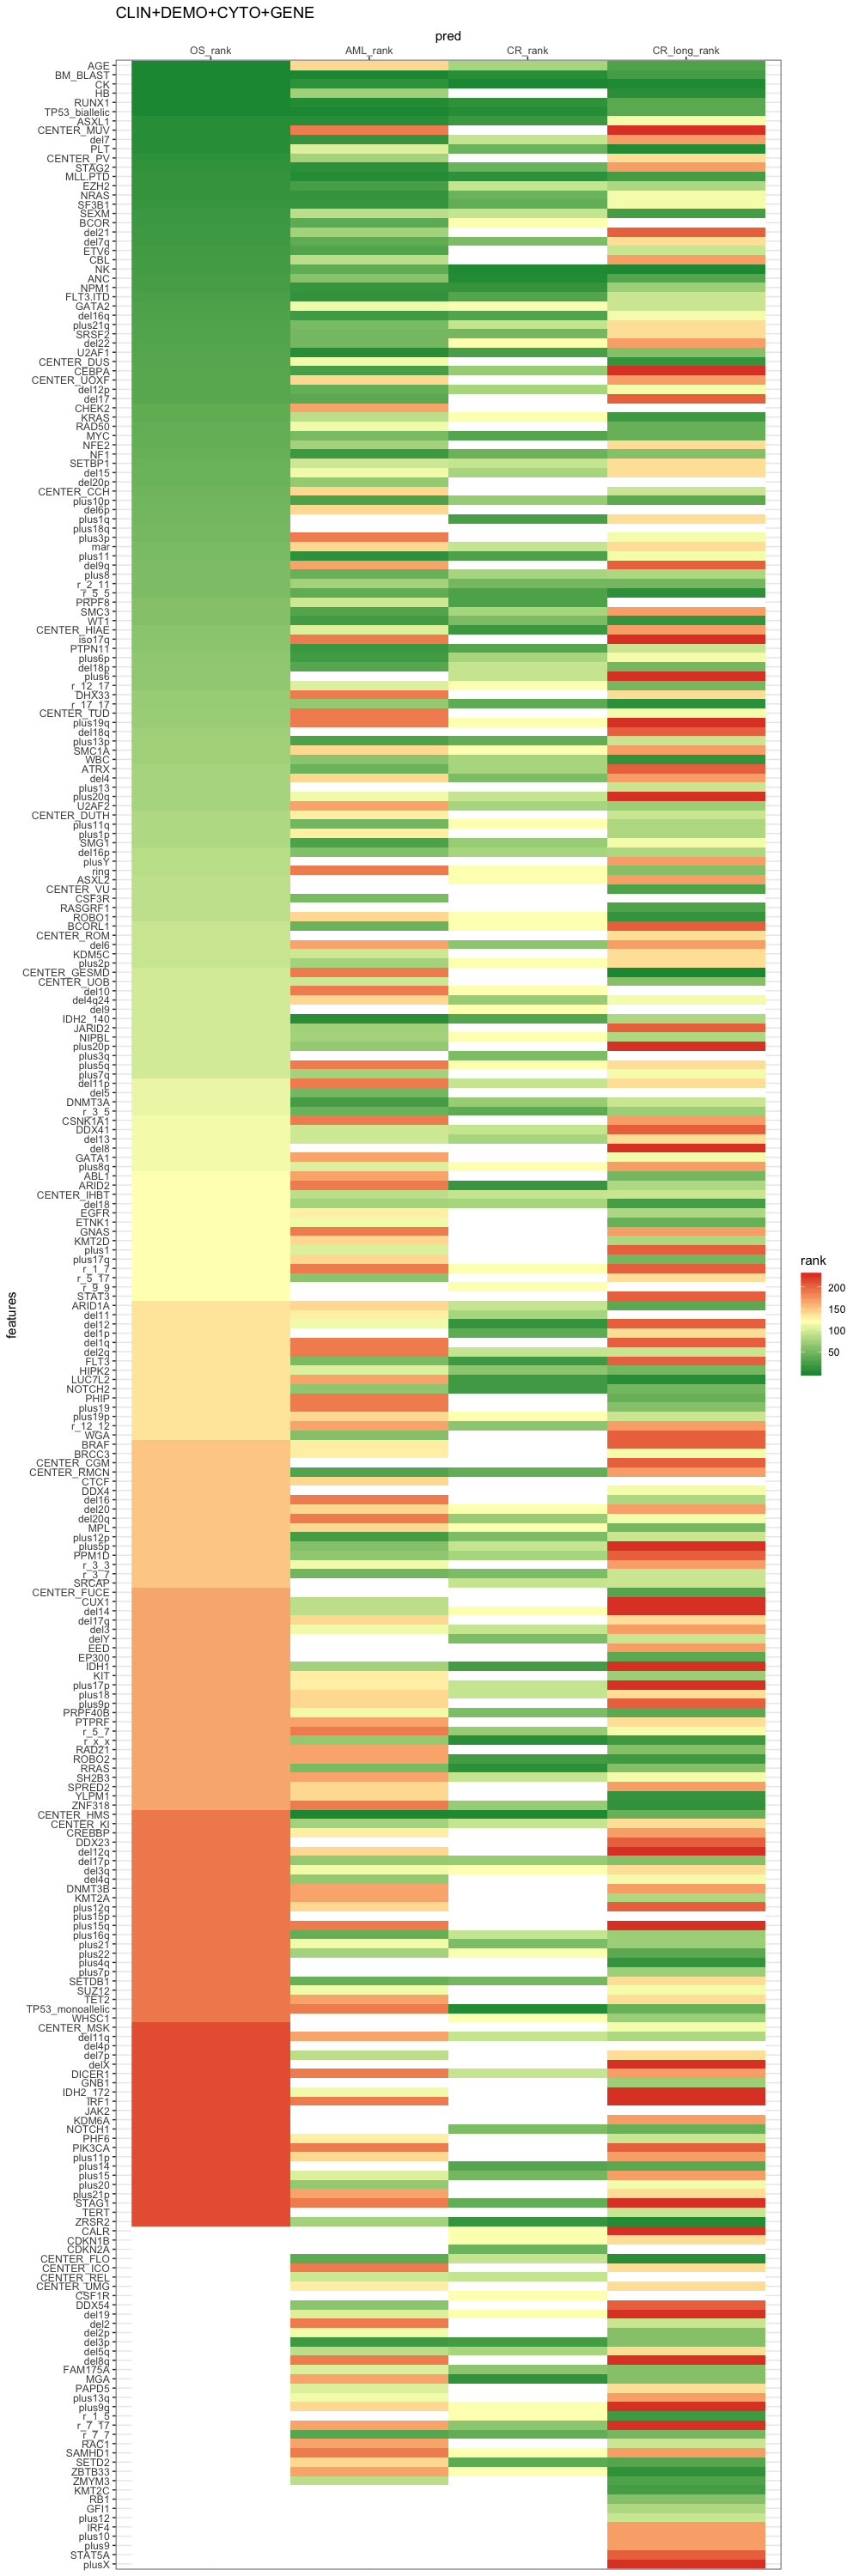

In [330]:
set_notebook_plot_size(10,30)
ggplot(CLIN_DEMO_CYTO_GENE_ranking, aes(features,pred)) +
  
  # geom raster heatmap
  geom_raster(aes(fill = rank), show.legend = TRUE) +
  scale_fill_gradient2(low="#1a9641", high="#d7191c",mid = "#ffffbf",midpoint=121,na.value = 'white') +
  scale_y_discrete(position = "right") +
  #theme(axis.text.x.top = element_text(angle = 30, hjust = 1)) +
  coord_flip() +
  ggtitle('CLIN+DEMO+CYTO+GENE')
